<a href="https://colab.research.google.com/github/hsnbnaa/deep-learning-is-easy/blob/main/Hands-on%20Machine%20Learning%20with%20Scikit-Learn%2C%20Keras%20%26%20TensorFlow/Chapter%2008/08_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

# Mengambil dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

# Melatih PCA dengan semua komponen untuk melihat explained variance
pca = PCA()
pca.fit(X)

# Mencari jumlah dimensi yang dibutuhkan untuk mempertahankan 95% varians
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1  # Hasilnya sekitar 154 dimensi

# Sekarang kita bisa menjalankan PCA dengan jumlah dimensi yang optimal
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X)

In [2]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll

# Membuat dataset Swiss roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# Menggunakan Kernel PCA dengan kernel RBF untuk membentangkan data
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [3]:
from sklearn.manifold import LocallyLinearEmbedding

# Menggunakan LLE untuk mengurangi dimensi dataset Swiss roll
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

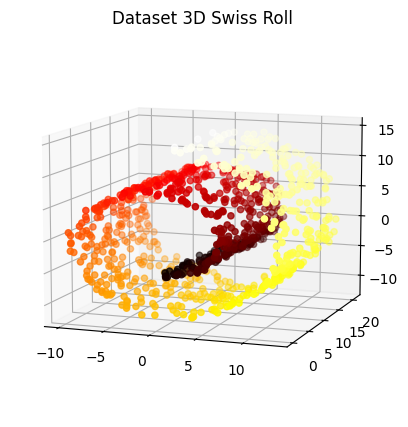

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

# Membuat data Swiss roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# Plotting dalam 3D
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.set_title("Dataset 3D Swiss Roll")
ax.view_init(10, -70)
plt.show()

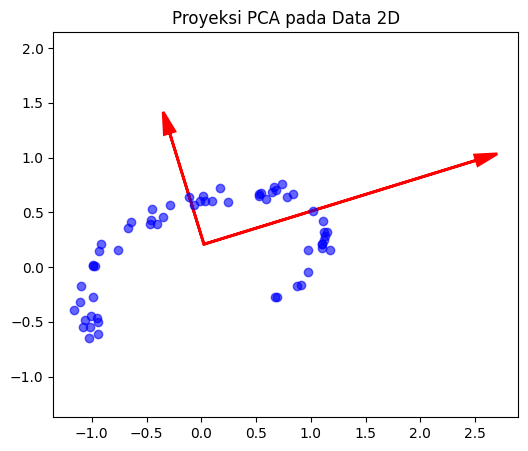

In [5]:
import numpy as np

# Membuat data 2D
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 2))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2

# Melatih PCA
pca = PCA(n_components=2)
pca.fit(X)

# Plotting
plt.figure(figsize=(6, 5))
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.6)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.arrow(pca.mean_[0], pca.mean_[1], v[0], v[1], head_width=0.1, head_length=0.2, linewidth=2, color="r")
plt.axis('equal')
plt.title("Proyeksi PCA pada Data 2D")
plt.show()

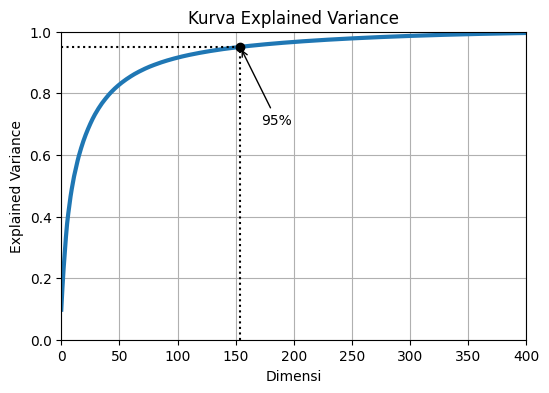

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

# Mengambil data MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

# Melatih PCA
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensi")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("95%", xy=(d, 0.95), xytext=(d + 18, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.title("Kurva Explained Variance")
plt.show()

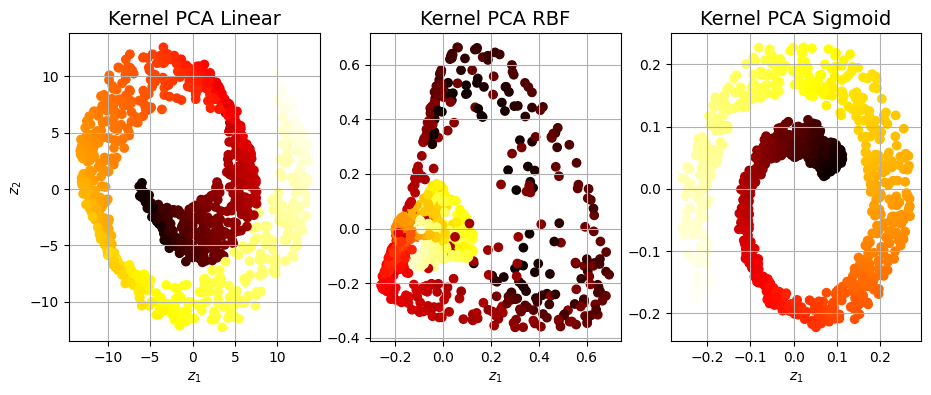

In [7]:
from sklearn.decomposition import KernelPCA

# Membuat data Swiss roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# Melatih kPCA dengan 3 kernel berbeda
lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

# Mengambil hasil transformasi
y = t > 6.9
X_reduced_lin = lin_pca.fit_transform(X)
X_reduced_rbf = rbf_pca.fit_transform(X)
X_reduced_sig = sig_pca.fit_transform(X)

# Plotting
plt.figure(figsize=(11, 4))
for subplot, X_reduced, title in ((131, X_reduced_lin, "Kernel PCA Linear"),
                                  (132, X_reduced_rbf, "Kernel PCA RBF"),
                                  (133, X_reduced_sig, "Kernel PCA Sigmoid")):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$")
    if subplot == 131:
        plt.ylabel("$z_2$")
    plt.grid(True)

plt.show()

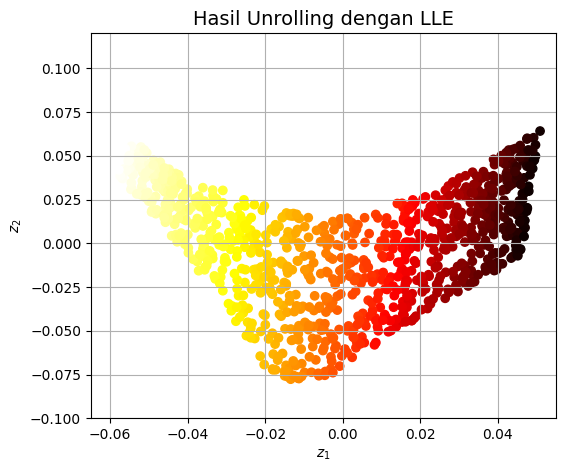

In [8]:
from sklearn.manifold import LocallyLinearEmbedding

# Membuat data Swiss roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# Melatih LLE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

# Plotting
plt.figure(figsize=(6, 5))
plt.title("Hasil Unrolling dengan LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$")
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.show()